<a href="https://colab.research.google.com/github/AlanVolta/MiCursoIPN/blob/master/Pr%C3%A1ctica8_Aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bid Data**

Las 4 V's del Big Data: velocidad, veracidad...

Apache Spark



In [2]:
!python --version


Python 3.7.11


In [3]:
!pwd

/content


In [9]:
!wget https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar -xvzf spark-3.0.0-bin-hadoop2.7.tgz
!pip install findspark

--2021-08-06 22:26:36--  https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220272364 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.0-bin-hadoop2.7.tgz.1’

spark-3.0.0-bin-had 100%[===================>] 210.07M  26.8MB/s    in 8.7s    

2021-08-06 22:26:45 (24.2 MB/s) - ‘spark-3.0.0-bin-hadoop2.7.tgz.1’ saved [220272364/220272364]

spark-3.0.0-bin-hadoop2.7/
spark-3.0.0-bin-hadoop2.7/NOTICE
spark-3.0.0-bin-hadoop2.7/kubernetes/
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.0-bin-hado

In [10]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"
import findspark
findspark.init()

In [13]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Practica Big Data").getOrCreate()
print(spark.sparkContext.appName)

Practica Big Data


In [17]:
data = [('Jose','Lopez','M',30),('Maria','Rodriguez','F',40),('Roberto','Martinez','M',60)]
columns = ['Nombre', 'Apellido','genero', 'salario']
df = spark.createDataFrame(data= data, schema= columns)
df.show()

+-------+---------+------+-------+
| Nombre| Apellido|genero|salario|
+-------+---------+------+-------+
|   Jose|    Lopez|     M|     30|
|  Maria|Rodriguez|     F|     40|
|Roberto| Martinez|     M|     60|
+-------+---------+------+-------+



In [19]:
from pyspark.sql.functions import concat_ws, col, lit
df.select(concat_ws(",",df.Nombre, df.Apellido).alias("Nombre completo"),df.genero, lit(df.salario*2).alias("Nuevo Salario")).show()

+----------------+------+-------------+
| Nombre completo|genero|Nuevo Salario|
+----------------+------+-------------+
|      Jose,Lopez|     M|           60|
| Maria,Rodriguez|     F|           80|
|Roberto,Martinez|     M|          120|
+----------------+------+-------------+



In [22]:
#RDD Data resilientes

rdd = df.rdd.map(lambda x: (x[0]+","+x[1],x[2], x[3]*2))
df2 = rdd.toDF(['Nombre completo','genero','Nuevo salario'])

In [23]:
df2.show()

+----------------+------+-------------+
| Nombre completo|genero|Nuevo salario|
+----------------+------+-------------+
|      Jose,Lopez|     M|           60|
| Maria,Rodriguez|     F|           80|
|Roberto,Martinez|     M|          120|
+----------------+------+-------------+



In [25]:
from pyspark.sql import Row

In [27]:
string_json = """{"CP}: 205, "tipo":"estandar","Ciudad":"Mexico","Estado":"Mexico"}"""
df =  spark.createDataFrame([(1,string_json)],["id","value"])
df.show(truncate = False)


+---+------------------------------------------------------------------+
|id |value                                                             |
+---+------------------------------------------------------------------+
|1  |{"CP}: 205, "tipo":"estandar","Ciudad":"Mexico","Estado":"Mexico"}|
+---+------------------------------------------------------------------+



In [28]:
from pyspark.sql.functions import json_tuple

In [39]:
#verificar o corregir
df.select(col("id"),json_tuple(col("value"),"CP","tipo","Ciudad","estado")).toDF("id","CP","tipo","Ciudad","estado").show(truncate) = False

SyntaxError: ignored

#**AI y Machine Learning**



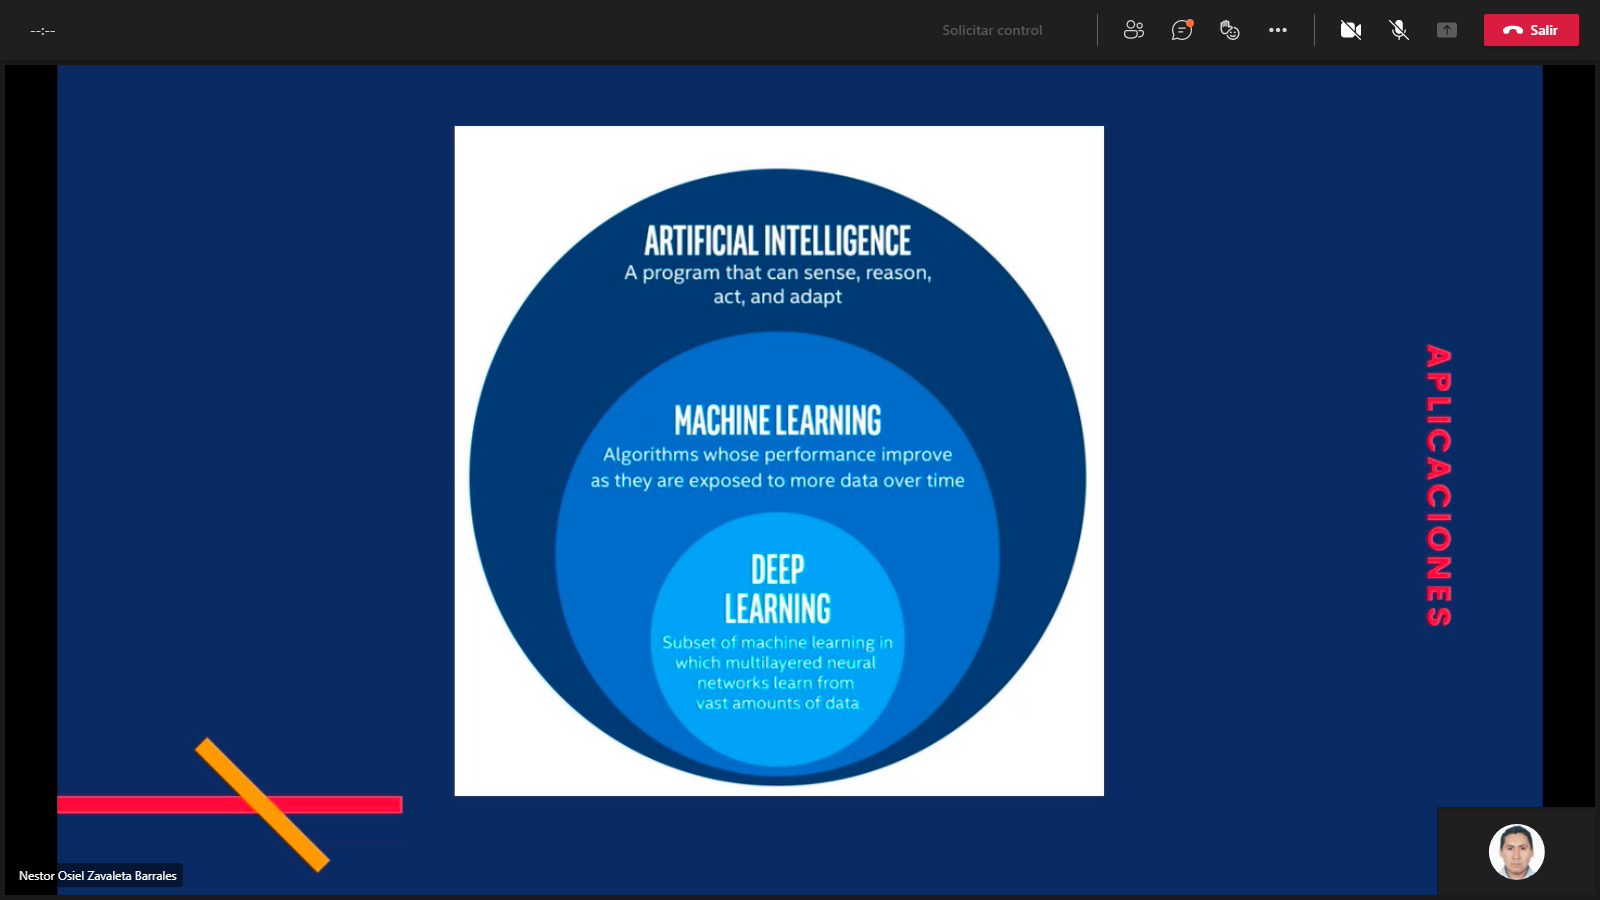

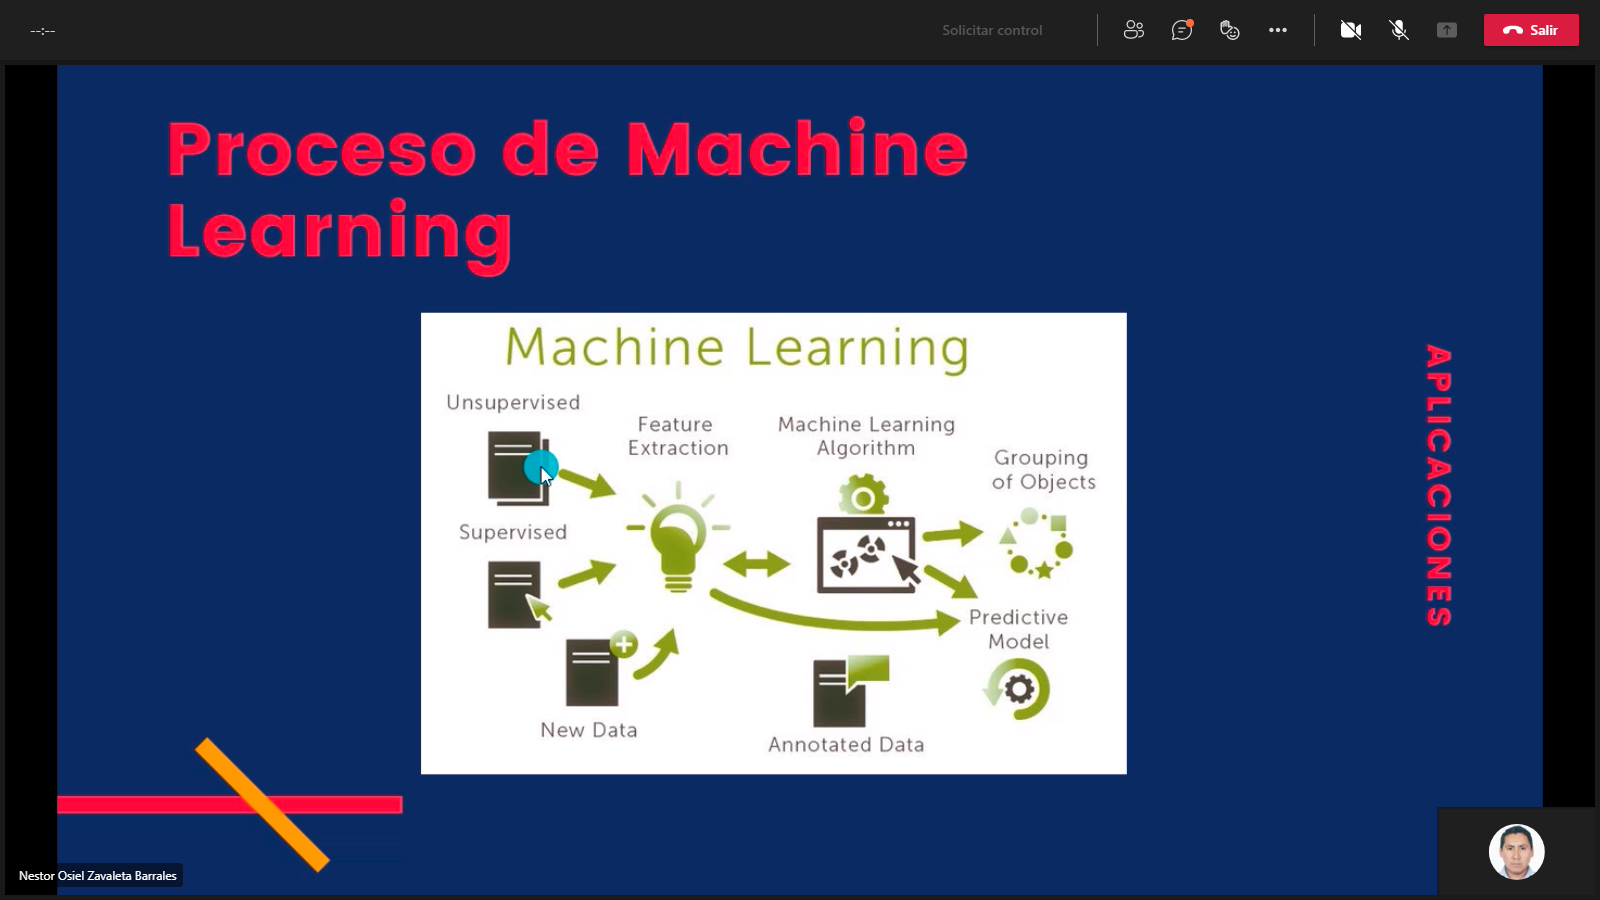

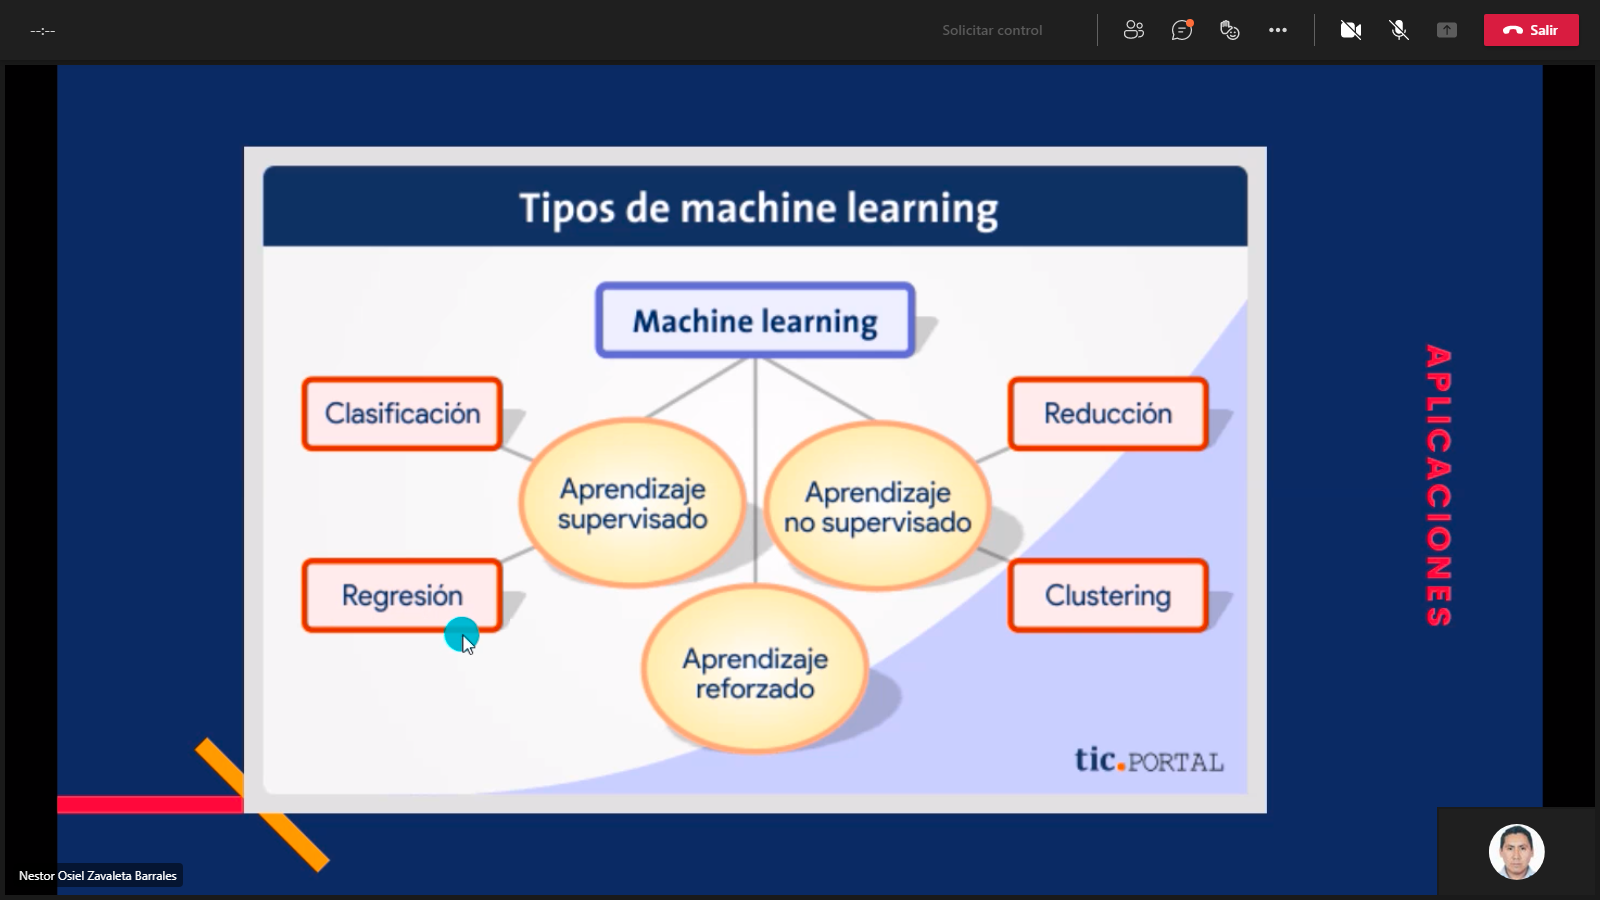

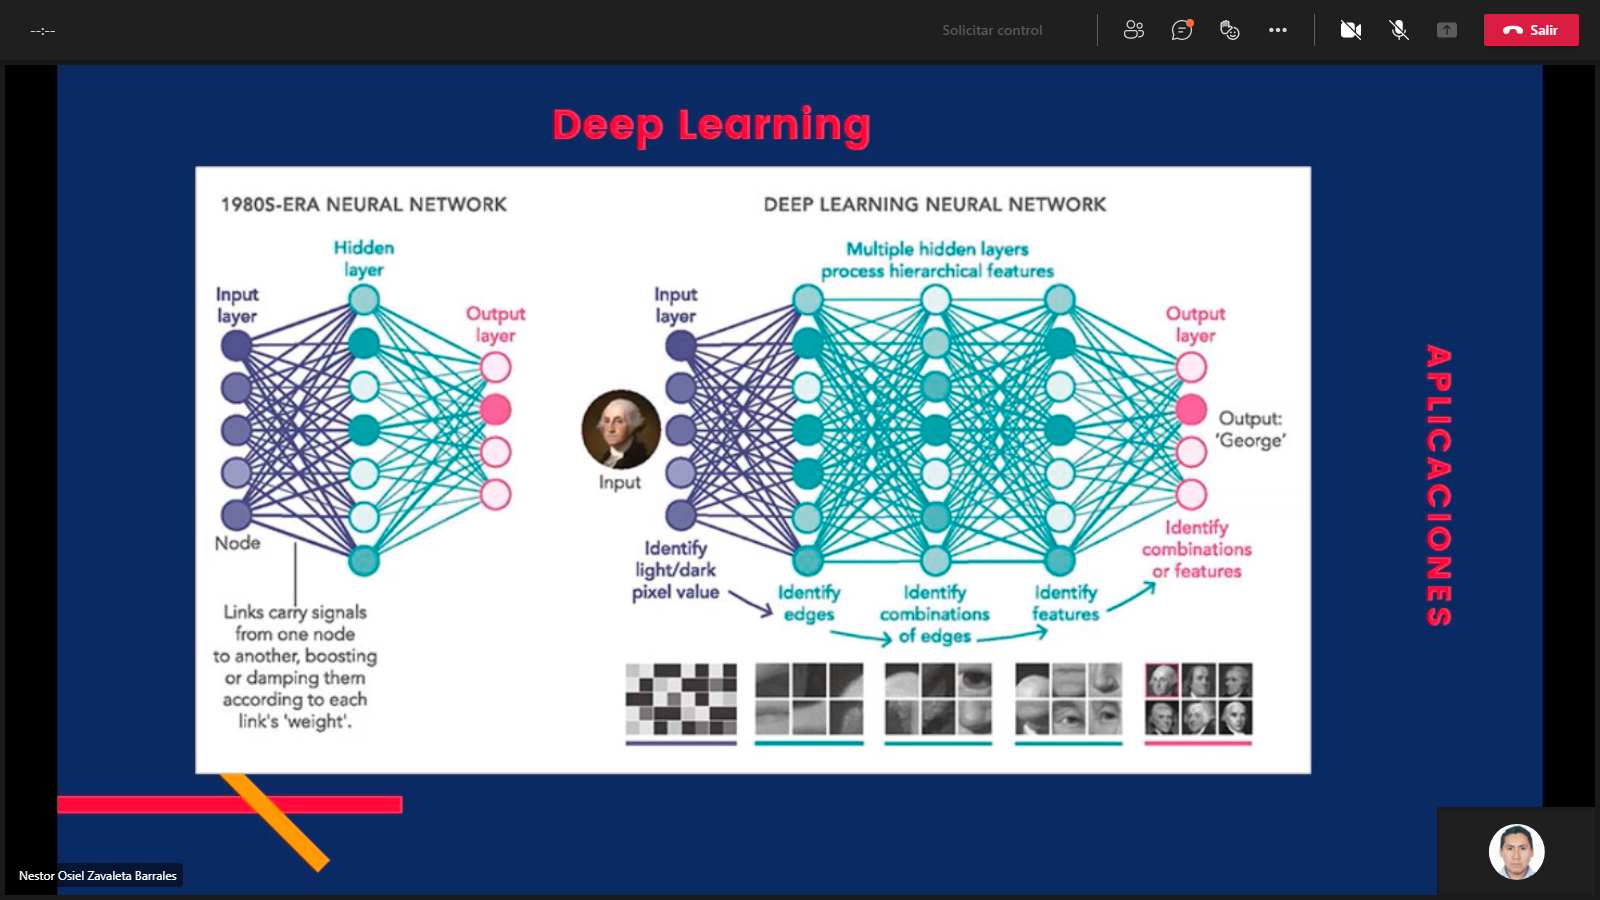